## Fake Job Post Detection using Machine Learning

---


#### Importing Neccessary Libraries

In [74]:
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings
warnings.filterwarnings('ignore')
#Handling text 
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score, classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# import xgboost



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import Dataset

In [75]:
data=pd.read_csv('fake_job_postings.csv')
data.head(5)

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

#### Dimension of the Data

In [76]:
data.shape

(17880, 18)

Check the Types of features

In [10]:
data.dtypes.to_frame()

0
job_id                int64
title                object
location             object
department           object
salary_range         object
company_profile      object
description          object
requirements         object
benefits             object
telecommuting         int64
has_company_logo      int64
has_questions         int64
employment_type      object
required_experience  object
required_education   object
industry             object
function             object
fraudulent            int64

Categorical features

In [77]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

Check the categorical variable

In [78]:
for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())
    

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

Check the null Values

#### Missing Values

In [79]:
round(data.isna().sum()/len(data)*100,2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

(array([5.00000e-01, 2.01500e+02, 4.02500e+02, 6.03500e+02, 8.04500e+02,
        1.00550e+03, 1.20650e+03, 1.40750e+03, 1.60850e+03, 1.80950e+03,
        2.01050e+03, 2.21150e+03, 2.41250e+03, 2.61350e+03, 2.81450e+03,
        3.01550e+03, 3.21650e+03, 3.41750e+03, 3.61850e+03, 3.81950e+03,
        4.02050e+03, 4.22150e+03, 4.42250e+03, 4.62350e+03, 4.82450e+03,
        5.02550e+03, 5.22650e+03, 5.42750e+03, 5.62850e+03, 5.82950e+03,
        6.03050e+03, 6.23150e+03, 6.43250e+03, 6.63350e+03, 6.83450e+03,
        7.03550e+03, 7.23650e+03, 7.43750e+03, 7.63850e+03, 7.83950e+03,
        8.04050e+03, 8.24150e+03, 8.44250e+03, 8.64350e+03, 8.84450e+03,
        9.04550e+03, 9.24650e+03, 9.44750e+03, 9.64850e+03, 9.84950e+03,
        1.00505e+04, 1.02515e+04, 1.04525e+04, 1.06535e+04, 1.08545e+04,
        1.10555e+04, 1.12565e+04, 1.14575e+04, 1.16585e+04, 1.18595e+04,
        1.20605e+04, 1.22615e+04, 1.24625e+04, 1.26635e+04, 1.28645e+04,
        1.30655e+04, 1.32665e+04, 1.34675e+04, 1.36

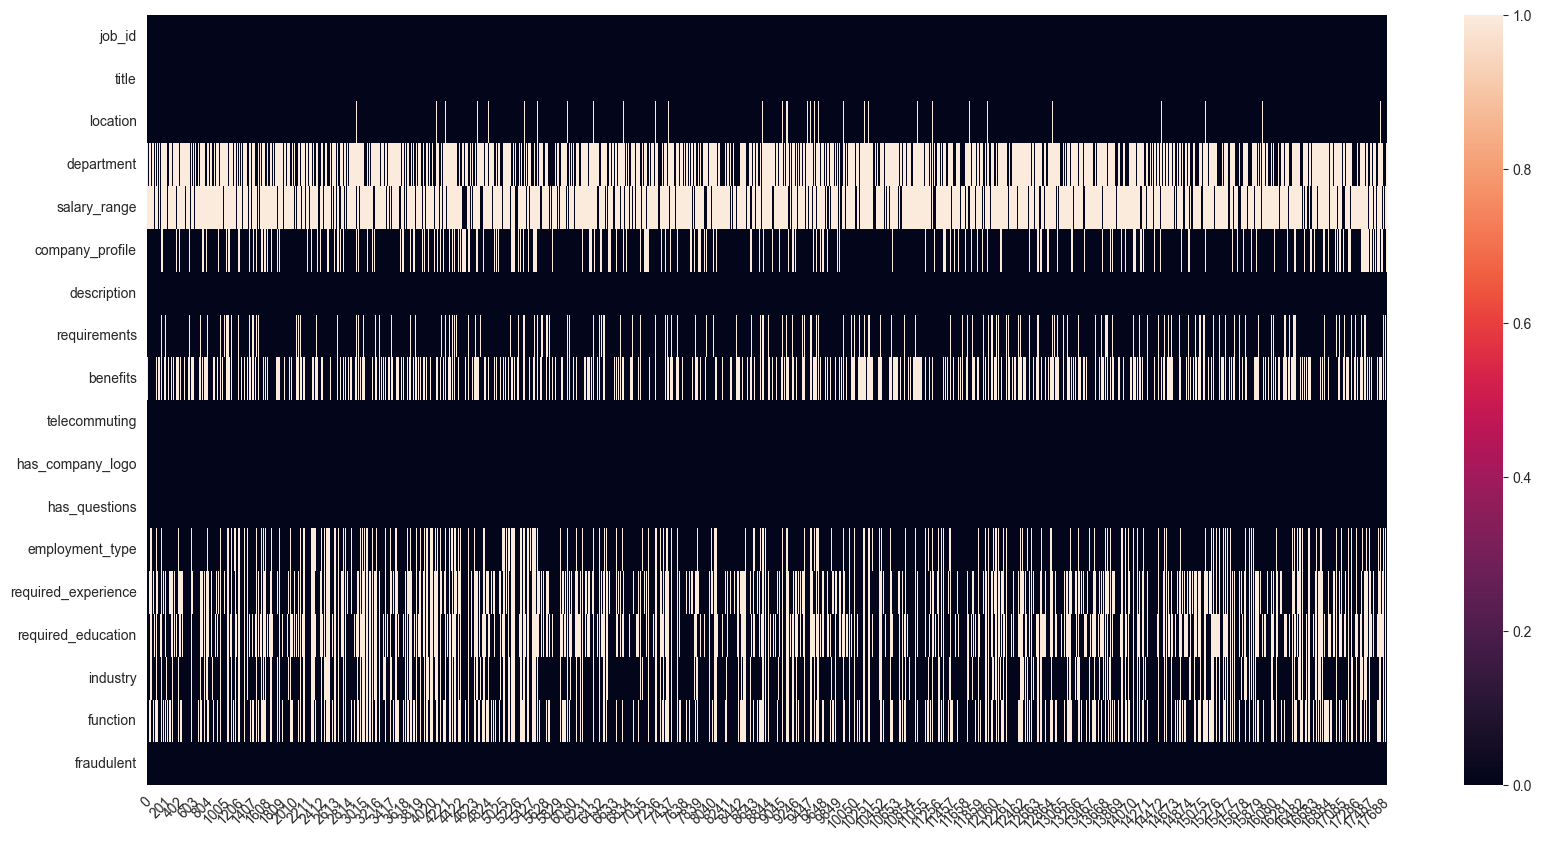

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose())
plt.xticks(rotation=45)

In [15]:
#Removing undesired columns & nan 
data.function.fillna(data.department,inplace=True)
data.drop(columns=['job_id','salary_range','department'],inplace=True)

In [81]:
#Now we need to handle missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [82]:
#filling nan in categorical data
categ_cols=data[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
17875          Computer Software                 Sales              0   
17876                   Internet   Accounting/Auditing              0   
17877                       None                  None              0   
17878             Graphic Design                Design              0   
17879          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
17875                 1              1           0  
17876                 1              1           0  
17877                 0              0           0  
17878                 0              1           0  
17879                 1              1           0  

[17880 rows x 9 columns]

In [83]:
#filling nan in text data
txt_cols=data[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
17875  What can you expect from us?We have an open cu...   
17876  Health &amp; WellnessMedical planPrescription ...   
17877                                                      
17878  Competitive salary (compensation will be based...   
17879                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                      
17879  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
17875       CA, ON, Toronto   
17876  US, PA, Philadelphia   
17877       US, TX, Houston   
17878         NG, LA, Lagos   
17879     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
17875  To ace this role you:Will eat comprehensive St...           0  
17876  - B.A. or B.S. in Accounting- Desire to have f...           0  
17877  At least 12 years professional experience.Abil...           0  
17878  1. Must be fluent in the latest versions of Co...           0  
17879  We wan

### Getting country names from location
#### we found that we have 91 Countries

In [84]:
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

country
US    10656
GB     2384
GR      940
CA      457
DE      383
..      ...
SI        1
CO        1
SD        1
UG        1
KH        1

[91 rows x 1 columns]

## Exploratory Data Analysis (Let's get Some Insights !)



- ###   Univariate Analysis for Target values


In [85]:
data['fraudulent'].value_counts().to_frame()

fraudulent
0       17014
1         866

([<matplotlib.patches.Wedge at 0x20f9a616d00>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

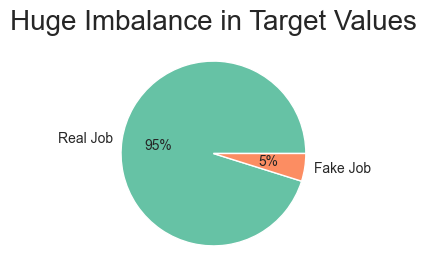

In [86]:
colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(7,3))
plt.title('Huge Imbalance in Target Values',size=20)
sns.set_style('whitegrid')
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

- ### Categorical Data and Target

In [22]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

------------------------------------------------------------------------------------------


## Industries / Experience / Need

### Top 10 industries require experience

In [23]:
exp_list=['Executive','Associate','Director','Mid-Senior level']
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]

In [24]:
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

required_experience
industry                required_experience                     
Accounting              Associate                             25
                        Mid-Senior level                      14
                        Director                               1
                        Executive                              1
Airlines/Aviation       Mid-Senior level                      23
                        Associate                             10
                        Executive                              3
                        Director                               1
Animation               Associate                              1
Apparel & Fashion       Mid-Senior level                      36
                        Associate                              9
                        Director                               6
Architecture & Planning Mid-Senior level                       3
                        Associate                              2
Automotive              Mid-Senior level                      32
                        Associate                             21
                        Director                               1
                        Executive                              1
Aviation & Aerospace    Mid-Senior level                       8
                        Associate                              5
                        Director                               5
Banking                 Associate                             32
                        Mid-Senior level                      29
                        Director                               2
                        Executive                              1
Biotechnology           Associate                             14
                        Mid-Senior level                      11
                        Director                               1
Broadcast Media         Mid-Senior level                      43
                        Associate                              4

### What Functions Require Experience?

In [25]:
exp_data_fun=exp_data.groupby('function')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_fun.head(30)

required_experience
function              required_experience                     
Account Management    Mid-Senior level                       1
Accounting/Auditing   Associate                             58
                      Mid-Senior level                      54
                      Director                               5
                      Executive                              3
Ad Sales              Director                               1
Administrative        Associate                            109
                      Mid-Senior level                      32
                      Executive                              6
                      Director                               3
Advertising           Mid-Senior level                      30
                      Associate                             17
                      Director                               4
All                   Mid-Senior level                       1
Apps                  Executive                              1
Art Studio            Associate                              1
Art/Creative          Mid-Senior level                      40
                      Associate                             23
                      Director                               5
Broadcasting          Associate                              1
Business              Mid-Senior level                       1
Business Analyst      Mid-Senior level                      26
                      Associate                             24
                      Director                               3
Business Development  Mid-Senior level                      59
                      Associate                             55
                      Director                              15
                      Executive                              6
Business Developmment Associate                              1
CSD Technology        Mid-Senior level                       1

---------------------------------------------------------------------------------------------------------------

### Countries with Employment Types

In [26]:
categ_cols.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(50)

employment_type
country employment_type                 
        None                         214
        Full-time                     96
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     34
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     37
        None                          28
        Contract                       6
        Other                          4
        Temporary                      3
BD      Full-time                      2
BE      Full-time                    107
        None                           5
        Temporary                      3
        Other                          2
BG      Full-time                     17
BH      None                           9
BR      Full-time                     27
        None                           6
        Contract                       2
        Other                          1
BY      Full-time                      5
        None                           4
CA      Full-time                    300
        None                          78
        Contract                      43
        Part-time                     30
        Other                          4
        Temporary                      2
CH      Full-time                     13
        None                           1
        Other                          1
CL      None                           2
CM      Full-time                      1
CN      Full-time                     10
        Contract                       3
        None                           2
CO      None                           1
CY      None                           6

------------------------------------------------------------------------------------------------------

### - Industries and Required Education

In [27]:
categ_cols.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(50)

required_education
industry                       required_education                                   
Accounting                     None                                               71
                               Bachelor's Degree                                  35
                               High School or equivalent                          29
                               Unspecified                                        15
                               Certification                                       4
                               Master's Degree                                     2
                               Professional                                        2
                               Some College Coursework Completed                   1
Airlines/Aviation              None                                               33
                               Bachelor's Degree                                  22
                               Unspecified                                         4
                               High School or equivalent                           3
                               Master's Degree                                     1
Alternative Dispute Resolution Vocational                                          1
Animation                      None                                                3
                               Certification                                       1
                               Unspecified                                         1
Apparel & Fashion              None                                               44
                               Bachelor's Degree                                  34
                               Unspecified                                         9
                               Associate Degree                                    5
                               High School or equivalent                           3
                               Master's Degree                                     1
                               Vocational                                          1
Architecture & Planning        Bachelor's Degree                                   6
                               None                                                4
Automotive                     High School or equivalent                          30
                               Bachelor's Degree                                  28
                               Unspecified                                        26
                               None                                               25
                               Associate Degree                                    8
                               Master's Degree                                     1
                               Some College Coursework Completed                   1
                               Vocational                                          1
Aviation & Aerospace           Bachelor's Degree                                  10
                               None                                                6
                               Master's Degree                                     5
                               Professional                                        2
                               Unspecified                                         1
Banking                        High School or equivalent                          33
                               Bachelor's Degree                                  21
                               None                                               13
                               Unspecified                                         6
                               Master's Degree                                     5
                               Professional                                        3
                               Associate Degree                        

--------------------------------------------------------------------------------------------------------------

## Textual Data 

## Exploring Text 

In [28]:
# As we used Country in location column as a category data
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True) 

#### Cleaning Text & Removing Stopwords and Stemming 

In [29]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [30]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)  

In [31]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

#### Applying Cleaning on Title

In [32]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)


KeyboardInterrupt: 

In [33]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [34]:
fraud_titles

98                      ice technician
144                        forward cap
173      technician instrument control
180                        sale execut
215             ice technician mt poso
                     ...              
17827    student posit parttim fulltim
17828                      sale associ
17829                  android develop
17830                     payrol clerk
17831                   furnitur mover
Name: title, Length: 866, dtype: object

In [35]:
# To List

fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()

In [36]:
# Corpus for WordCloud
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

#### Most Common Titles for Fake & Real Jobs

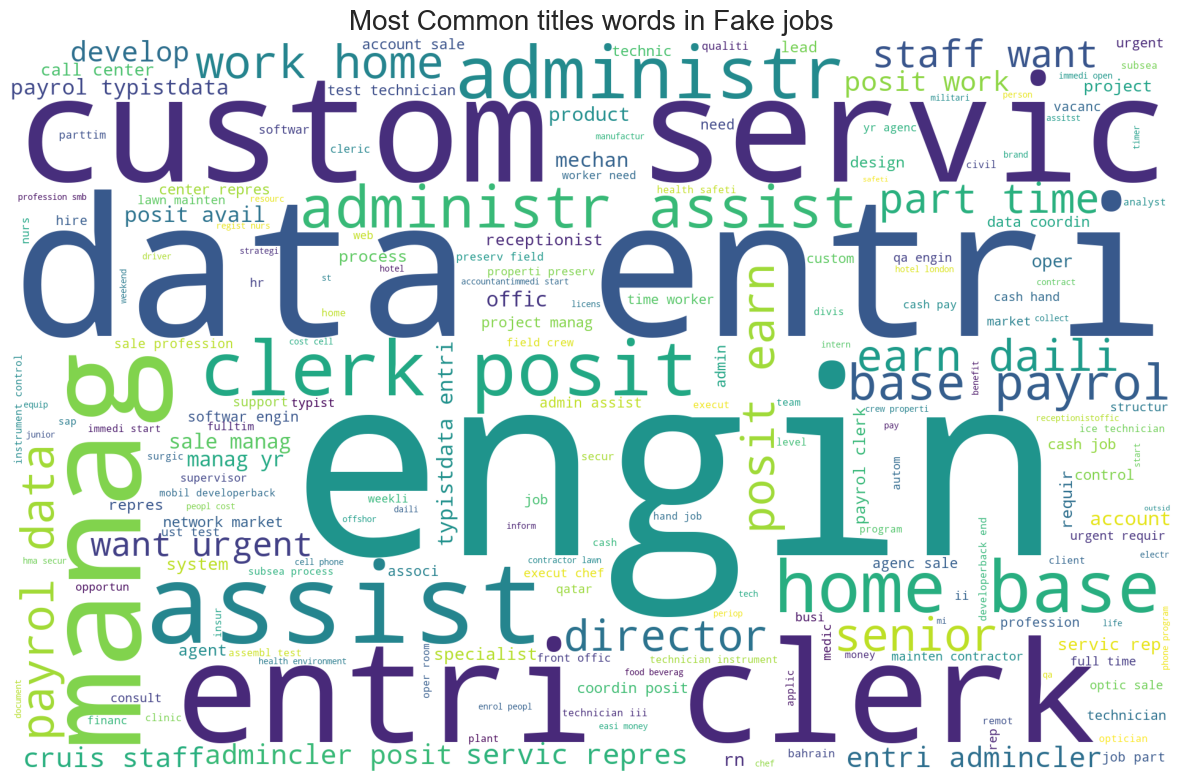

In [37]:
plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)
plt.show()

In [38]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)
plt.show()

KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Fake Titles Lengths')

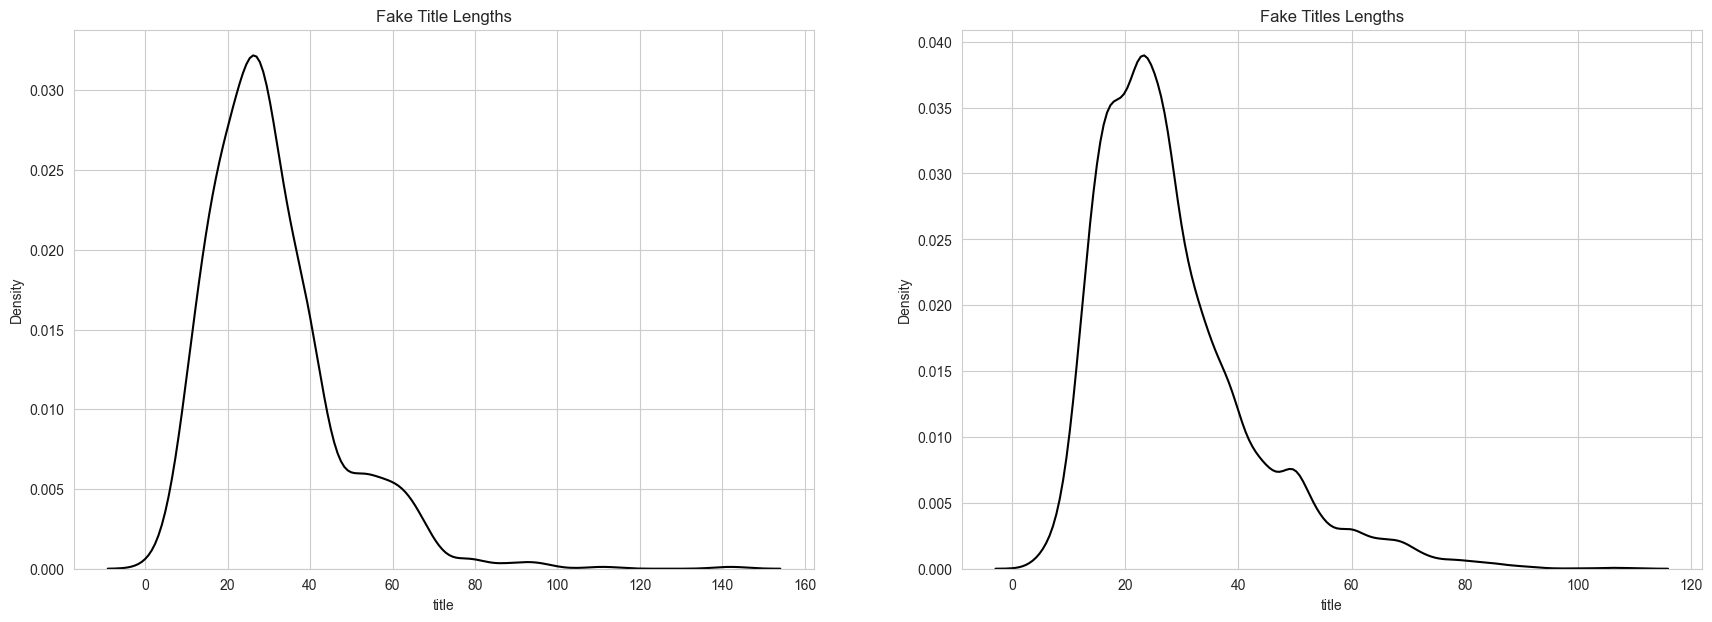

In [39]:
fraud_title_length=txt_cols[txt_cols["fraudulent"]==1]['title'].str.len()
not_fraud_title_length=txt_cols[txt_cols["fraudulent"]==0]['title'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_title_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_title_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Title Lengths',fontsize=12)
axes[1].set_title('Fake Titles Lengths',fontsize=12)



-------------------------------------------------------------------

In [40]:
txt_fraud['benefits']=txt_fraud['benefits'].apply(column_clean)
txt_not_fraud['benefits']=txt_not_fraud['benefits'].apply(column_clean)


KeyboardInterrupt: 

In [41]:
fraud_benefits = txt_fraud['benefits'].apply(combine)
not_fraud_benefits = txt_not_fraud['benefits'].apply(combine)

In [42]:
# To List

fraud_benefits_corpus=fraud_benefits.values.tolist()
not_fraud_benefits_corpus=not_fraud_benefits.values.tolist()



In [43]:
# Corpus for WordCloud
fraud_benefits_corpus=' '.join(fraud_benefits_corpus)
not_fraud_benefits_corpus=' '.join(not_fraud_benefits_corpus)

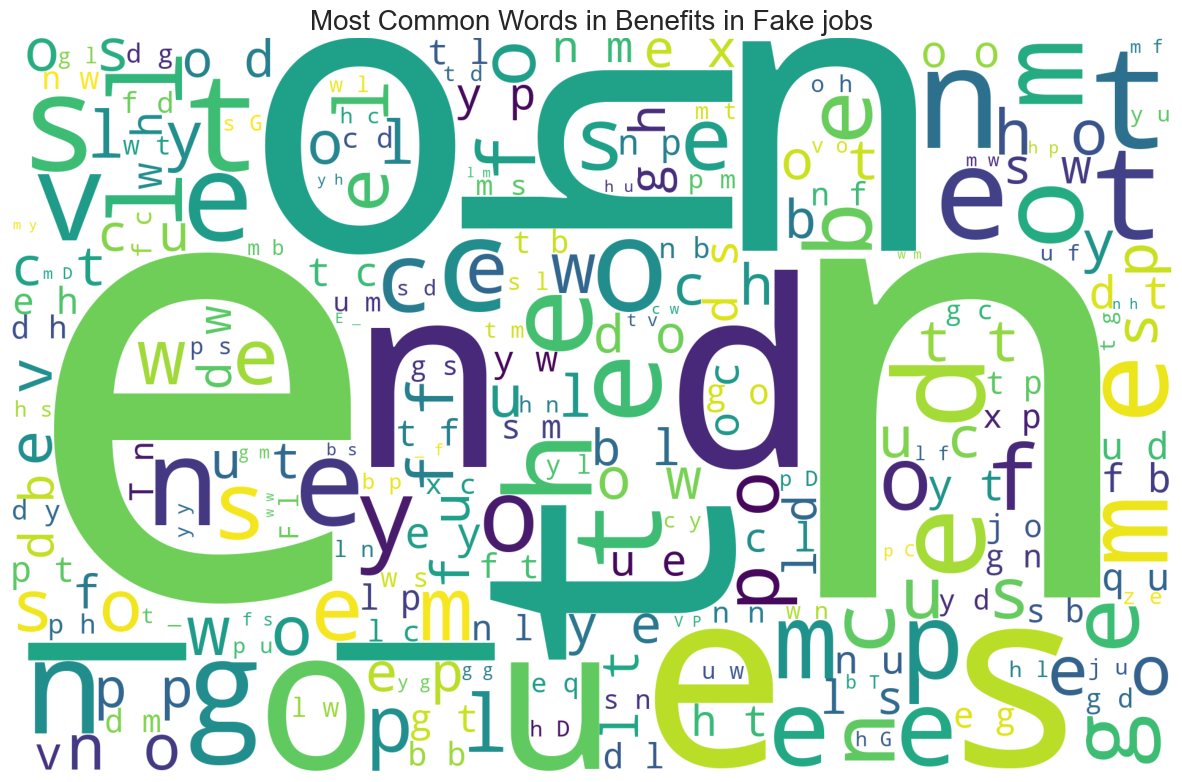

In [44]:
plt.figure(figsize=(15,10))
wordcloud_fraud_ben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_ben)

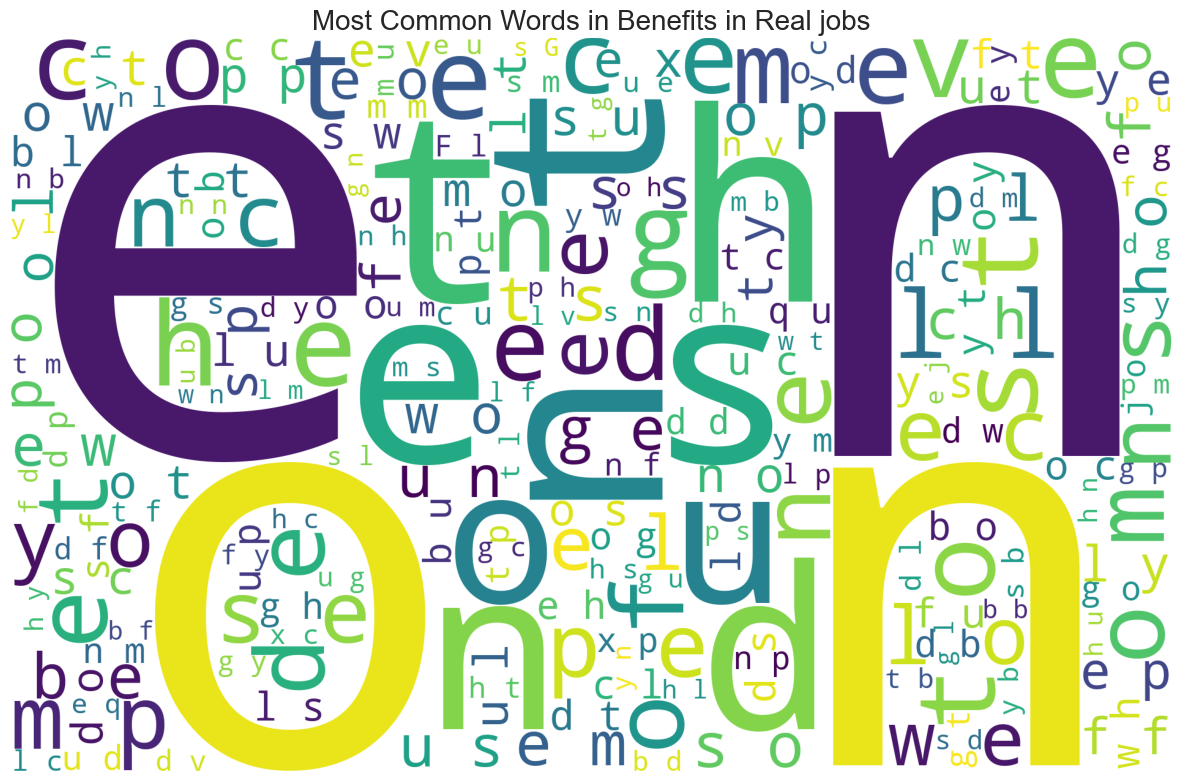

In [45]:
plt.figure(figsize=(15,10))
wordcloud_notfraudben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Real jobs',size=20)
plt.imshow(wordcloud_notfraudben)

Text(0.5, 1.0, 'Real Benefits Lengths')

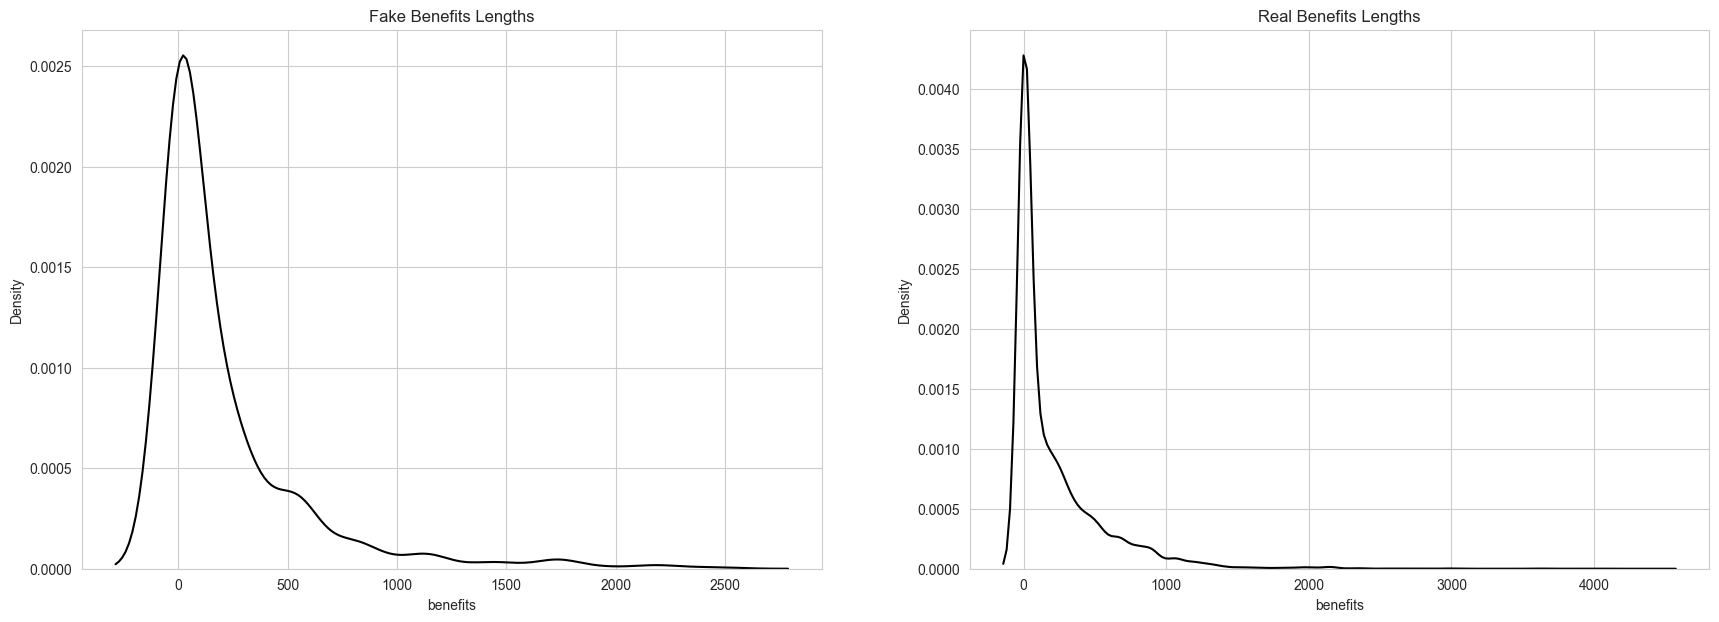

In [46]:
fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==1]['benefits'].str.len()
not_fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==0]['benefits'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_benefits_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_benefits_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Benefits Lengths',fontsize=12)
axes[1].set_title('Real Benefits Lengths',fontsize=12)


---------------------------------------------------------

In [47]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

KeyboardInterrupt: 

In [48]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)

In [49]:
# To List
fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [50]:
# Corpus for WordCloud
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

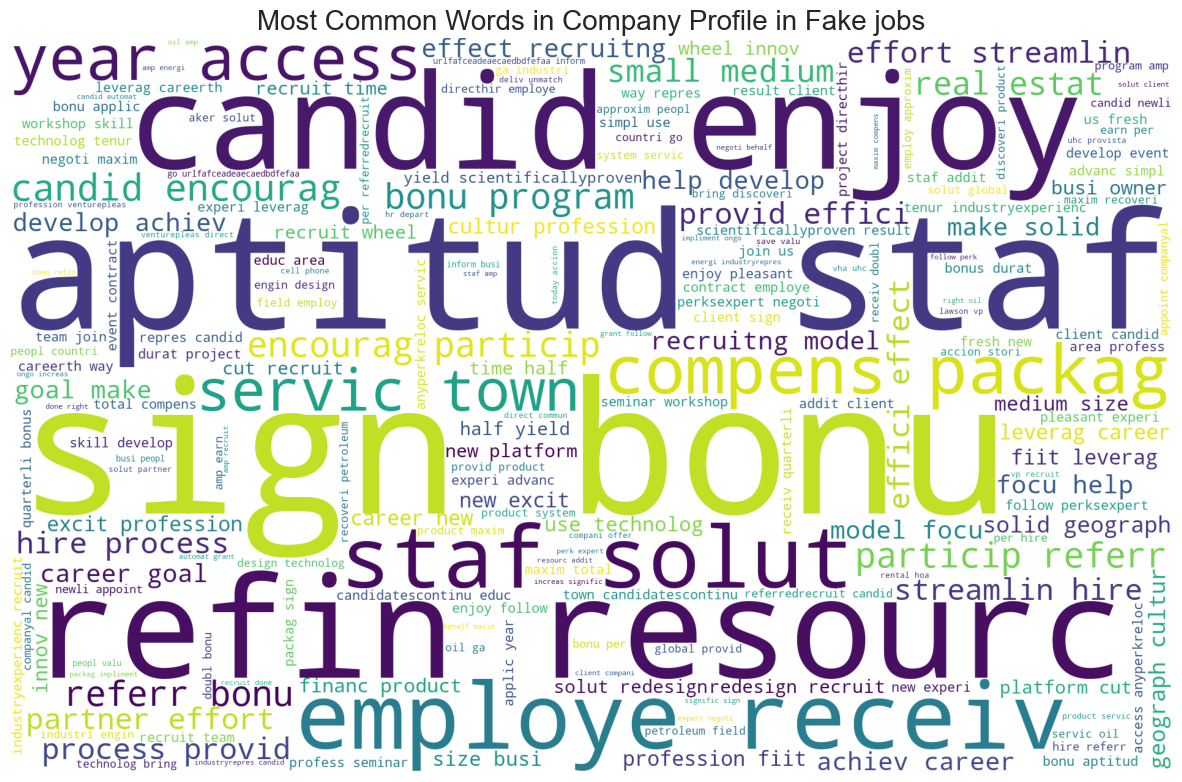

In [51]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)
plt.show()

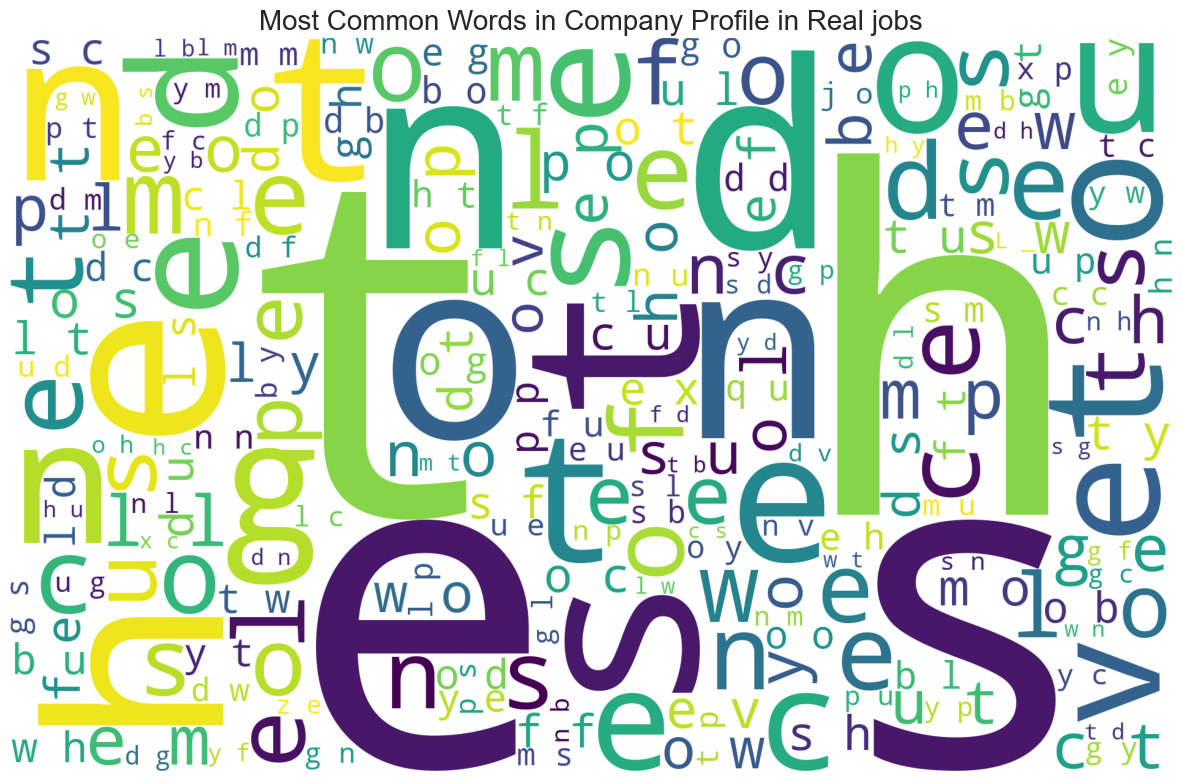

In [52]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)
plt.show()

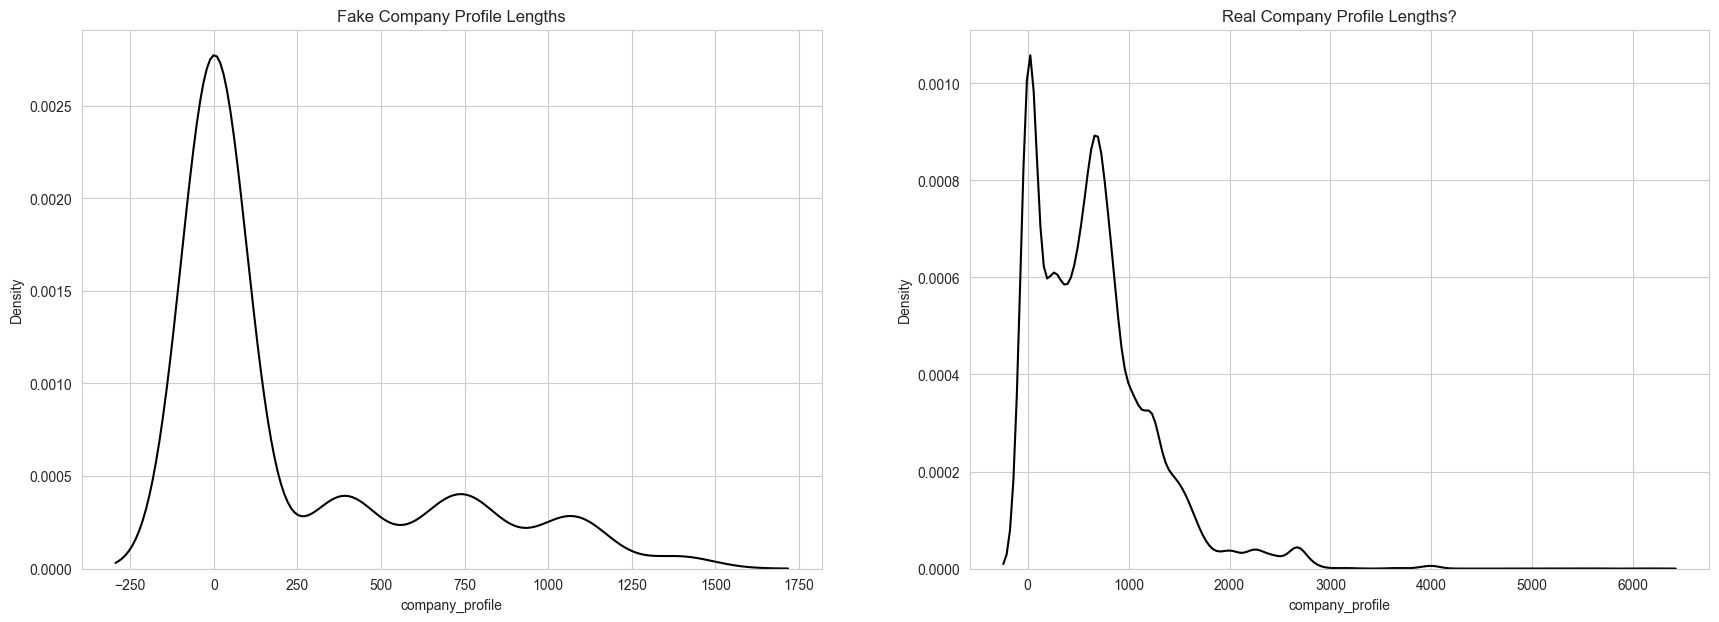

In [53]:
fraud_company_length=txt_cols[txt_cols["fraudulent"]==1]['company_profile'].str.len()
not_fraud_company_length=txt_cols[txt_cols["fraudulent"]==0]['company_profile'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_company_length,ax=axes[0],color='black') 
sns.kdeplot(not_fraud_company_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Company Profile Lengths',fontsize=12)
axes[1].set_title('Real Company Profile Lengths?',fontsize=12)
plt.show()

In [54]:
txt_fraud['requirements']=txt_fraud['requirements'].apply(column_clean)
txt_not_fraud['requirements']=txt_not_fraud['requirements'].apply(column_clean)

KeyboardInterrupt: 

In [55]:
fraud_requirements = txt_fraud['requirements'].apply(combine)
not_fraud_requirements = txt_not_fraud['requirements'].apply(combine)

In [56]:
# To List
fraud_requirements_corpus=fraud_requirements.values.tolist()
not_fraud_requirements_corpus=not_fraud_requirements.values.tolist()

In [57]:
# Corpus for WordCloud
fraud_requirements_corpus=' '.join(fraud_requirements_corpus)
not_fraud_requirements_corpus=' '.join(not_fraud_requirements_corpus)

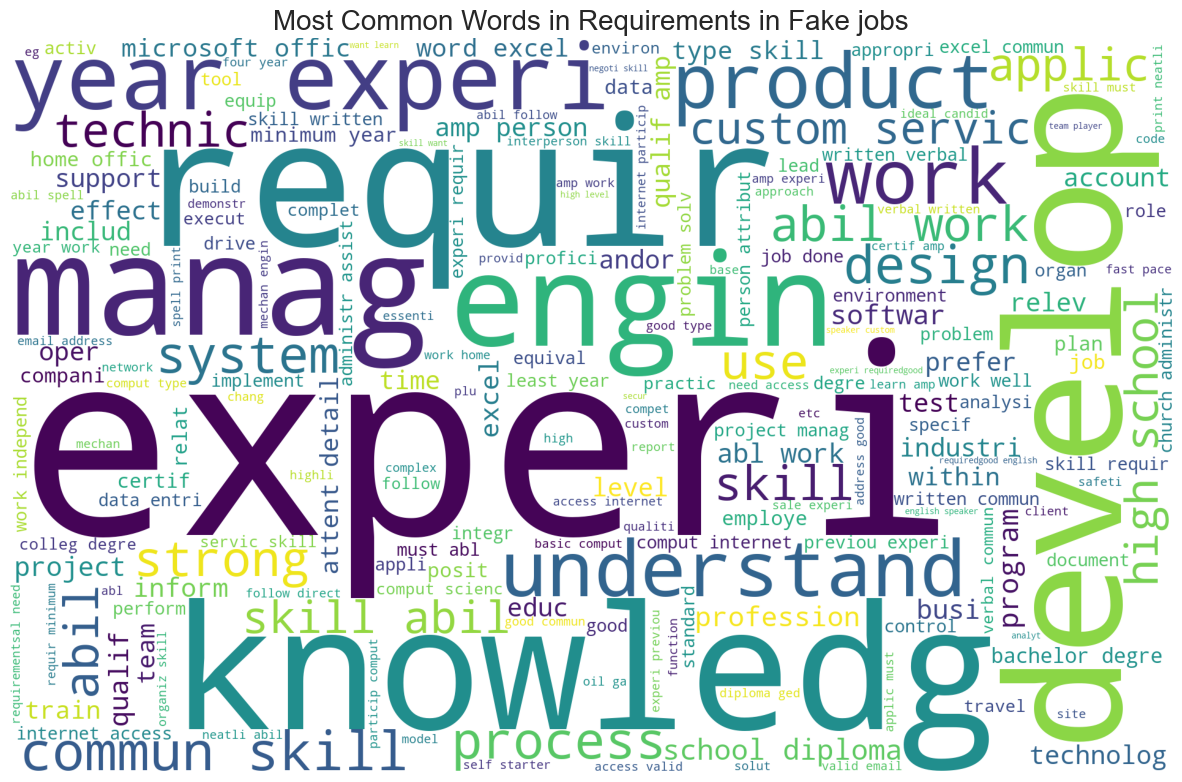

In [58]:
plt.figure(figsize=(15,10))
wordcloud_fraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_requirements)
plt.show()

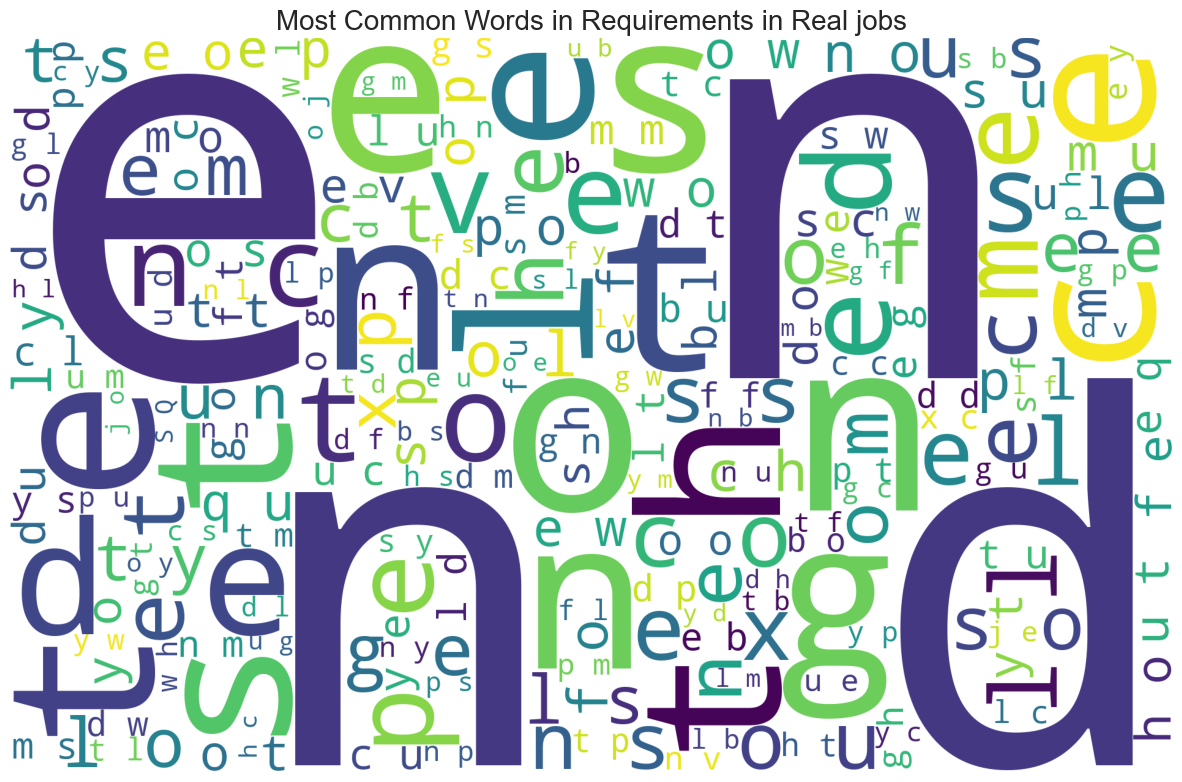

In [59]:
plt.figure(figsize=(15,10))
wordcloud_notfraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Real jobs',size=20)
plt.imshow(wordcloud_notfraud_requirements)
plt.show()

----------------------------------------

In [60]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [61]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [62]:
data['text']=data['text'].apply(column_clean)

KeyboardInterrupt: 

In [63]:
data['text']=data['text'].apply(combine)

In [64]:
plt.figure(figsize = (15,10)) 
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)
plt.show()

KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

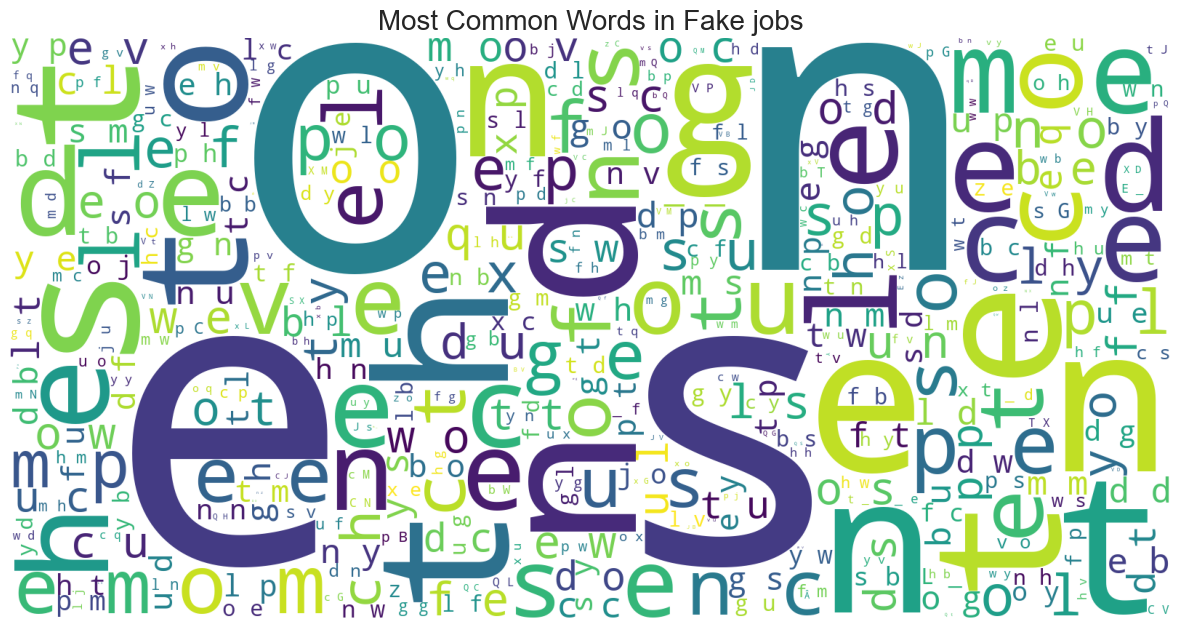

In [65]:
plt.figure(figsize = (15,10)) 
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)
plt.show()

In [66]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [70]:
# Applying Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [71]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

NameError: name 'vec' is not defined

In [72]:
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [81]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

## Building Models and Evaluation

In [111]:
# Naive Bayes
nb=MultinomialNB()
nb.fit(x_train,y_train)
nb_y_pred=nb.predict(x_test)

In [142]:
print('        Training Classification report for Naive Bayes \n',classification_report(y_train,nb.predict(x_train)))
print('        Testing Classification Report for Naive Bayes \n',classification_report(y_test,nb_y_pred))

print('        Confusion Matrix for Training Naive Bayes \n',plot_confusion_matrix(nb,x_train,y_train))
print('        Confusion Matrix for Testing Naive Bayes \n',plot_confusion_matrix(nb,x_test,y_test))
plt.show()

TypeError: 'MultinomialNB' object is not subscriptable

In [93]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

In [115]:
import plot_confusion_matrix
print('Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

print('Confusion Matrix for Training Logistic Regression \n',plot_confusion_matrix(lr,x_train,y_train))
print('Confusion Matrix for Testing Logistic Regression \n',plot_confusion_matrix(lr,x_test,y_test))
plt.show()

        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.94      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576



TypeError: 'module' object is not callable

In [98]:
# KNN
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)

In [99]:
import plot_confusion_matrix
print('        Training Classification report for KNN \n',classification_report(y_train,lr.predict(x_train)))
print('        Testing Classification Report for KNN \n',classification_report(y_test,knn_y_pred))

print('        Confusion Matrix for Training KNN \n',plot_confusion_matrix(knn,x_train,y_train))
print('        Confusion Matrix for Testing KNN \n',plot_confusion_matrix(knn,x_test,y_test))
plt.show()

        Training Classification report for KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for KNN 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.52      0.76      0.62       173

    accuracy                           0.95      3576
   macro avg       0.76      0.86      0.80      3576
weighted avg       0.97      0.95      0.96      3576



TypeError: 'module' object is not callable

In [127]:
# DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

In [131]:
print('        Training Classification report for Decision Tree Classifier \n',classification_report(y_train,dt.predict(x_train)))
print('        Testing Classification Report for Decision Tree Classifier \n',classification_report(y_test,dt_y_pred))
print('        Confusion Matrix for Training Decision Tree Classifier \n',plot_confusion_matrix(dt,x_train,y_train))
print('        Confusion Matrix for Testing Decision Tree Classifier\n',plot_confusion_matrix(dt,x_test,y_test))
plt.show()

Confusion Matrix for Training Decision Tree Classifier:


TypeError: 'module' object is not callable

### Tree Based 

In [120]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

        Training Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.62      0.76       173

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576

        Confusion Matrix for Training Random Forest Classifier 
        Confusion Matrix for Testing Random Foresr Classifier


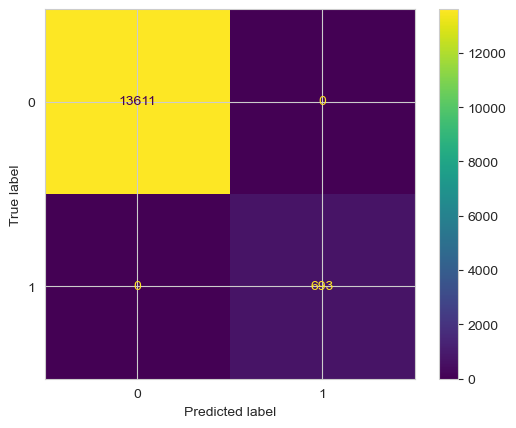

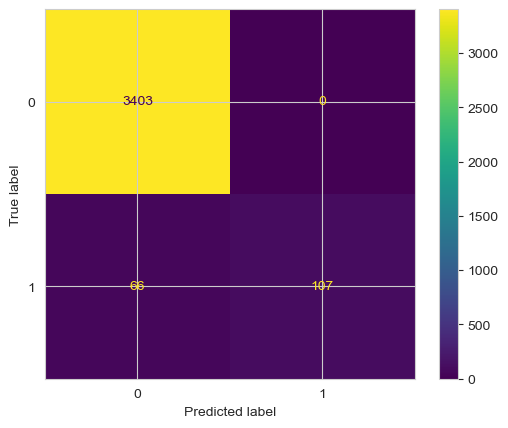

In [121]:
print('        Training Classification report for Random Forest Classifier \n',classification_report(y_train,rf.predict(x_train)))
print('        Testing Classification Report for Random Forest Classifier \n',classification_report(y_test,rf_y_pred))


print('        Confusion Matrix for Training Random Forest Classifier \n',plot_confusion_matrix(rf,x_train,y_train))
print('        Confusion Matrix for Testing Random Forest Classifier\n',plot_confusion_matrix(rf,x_test,y_test))
plt.show()

In [122]:
xgb=xgb.XGBClassifier(max_depth=6, learning_rate=0.1,silent=False, objective='binary:logistic')
xgb.fit(x_train,y_train)
xgb_y_pred=xgb.predict(x_test)

[13:24:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



        Training Classification report for XGBoost Classifier 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13611
           1       1.00      0.86      0.92       693

    accuracy                           0.99     14304
   macro avg       1.00      0.93      0.96     14304
weighted avg       0.99      0.99      0.99     14304

        Testing Classification Report for XGBoost Classifier 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.98      0.71      0.83       173

    accuracy                           0.99      3576
   macro avg       0.98      0.86      0.91      3576
weighted avg       0.99      0.99      0.98      3576

        Confusion Matrix for Training XGBoost Classifier 
        Confusion Matrix for Testing XGBoost Classifier


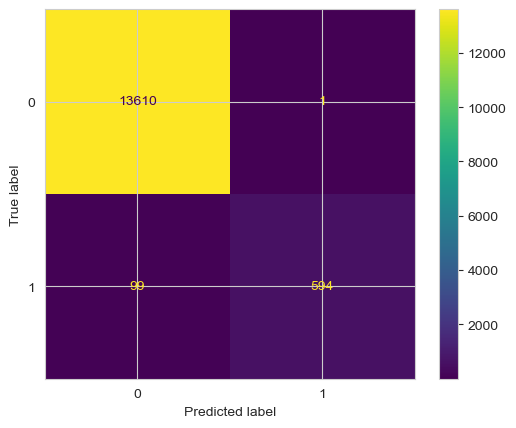

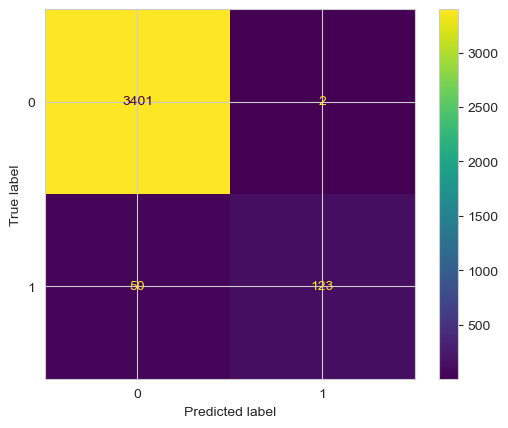

In [123]:
print('        Training Classification report for XGBoost Classifier \n',classification_report(y_train,xgb.predict(x_train)))
print('        Testing Classification Report for XGBoost Classifier \n',classification_report(y_test,xgb_y_pred))


print('        Confusion Matrix for Training XGBoost Classifier \n',plot_confusion_matrix(xgb,x_train,y_train))
print('        Confusion Matrix for Testing XGBoost Classifier\n',plot_confusion_matrix(xgb,x_test,y_test))
plt.show()

In [124]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_y_pred=ada.predict(x_test)

        Training Classification report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13611
           1       0.80      0.56      0.66       693

    accuracy                           0.97     14304
   macro avg       0.89      0.78      0.82     14304
weighted avg       0.97      0.97      0.97     14304

        Testing Classification Report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.82      0.57      0.67       173

    accuracy                           0.97      3576
   macro avg       0.90      0.78      0.83      3576
weighted avg       0.97      0.97      0.97      3576

        Confusion Matrix for Training AdaBoost Classifier 
        Confusion Matrix for Testing AdaBoost Classifier


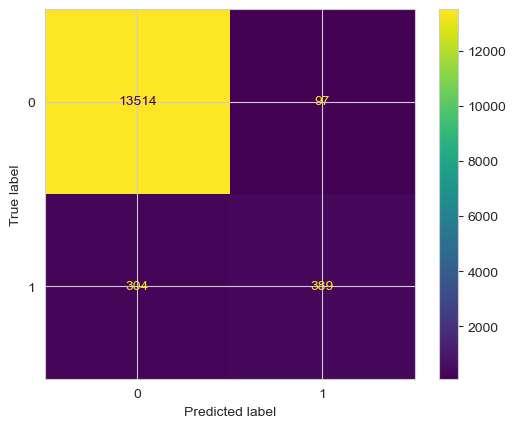

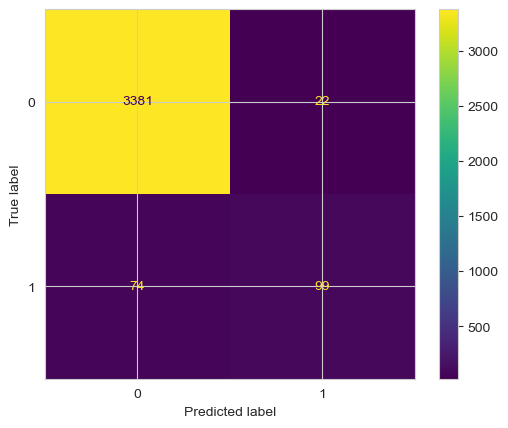

In [125]:
print('        Training Classification report for AdaBoost Classifier \n',classification_report(y_train,ada.predict(x_train)))
print('        Testing Classification Report for AdaBoost Classifier \n',classification_report(y_test,ada_y_pred))


print('        Confusion Matrix for Training AdaBoost Classifier \n',plot_confusion_matrix(ada,x_train,y_train))
print('        Confusion Matrix for Testing AdaBoost Classifier\n',plot_confusion_matrix(ada,x_test,y_test))
plt.show()